# Task A1: Gender recognition
Shyh Hao Liew
16067637

In [20]:
import os
import sys
sys.path.append(os.path.abspath(r"//Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/A1"))

import A1_landmarks as a1
import A1_landmarks_newdata as a1_new
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [21]:
def get_data_A1():

    X_A1, y_A1 = a1.extract_features_labels()
    Y_A1 = np.array([y_A1, -(y_A1 - 1)]).T
    
    # Rescaling Data
    scaler = StandardScaler()
    temp_X_reshape = X_A1.reshape(len(X_A1), len(X_A1[0]) * len(X_A1[0][0]))
    temp_X_A1 = scaler.fit_transform(temp_X_reshape)
    
    #     print(tr_X.shape)
    #     print(te_X.shape)
    #     print(tr_Y.shape)
    #     print(te_Y.shape)
    
    tr_X_A1, te_X_A1, tr_Y_A1, te_Y_A1 = train_test_split(temp_X_A1, Y_A1, test_size=0.3, random_state=0)
   
    
    return tr_X_A1, tr_Y_A1, te_X_A1, te_Y_A1

In [22]:
def A1_SVM(training_images, training_labels, test_images, test_labels):

    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C':[1, 10, 100]},
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                        ]
    classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs = -1)
    classifier.fit(training_images, training_labels)
                                
#  SVM Accuracy
    acc_A1_train = classifier.best_score_

#  Choosing the best accuracy using GridSearchCV
    pred_A1 = classifier.best_estimator_.predict(test_images)
    acc_A1_test = accuracy_score(test_labels, pred_A1)

    print(classifier.best_estimator_)
    print()
    print(classifier.best_params_)
    
    return acc_A1_train, acc_A1_test, pred_A1

In [7]:
# Run A1 accuracy test(MAIN.py)
from datetime import datetime
start = datetime.now()
    
tr_X_A1, tr_Y_A1, te_X_A1, te_Y_A1= get_data_A1()

model_A1 = A1_SVM(tr_X_A1, list(zip(*tr_Y_A1))[0], te_X_A1, list(zip(*te_Y_A1))[0])

acc_A1_train, acc_A1_test, pred_A1 = model_A1

print('TA1:{},{}'.format(acc_A1_train, acc_A1_test))

print(datetime.now() - start)

/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

{'C': 1, 'kernel': 'linear'}
TA1:0.9201430274135876,0.9179986101459346
0:04:18.529553


In [12]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Generate a simple plot of the test and training learning curve.

#     Parameters
#     ----------
#     estimator : object type that implements the "fit" and "predict" methods
#         An object of that type which is cloned for each validation.

#     title : string
#         Title for the chart.

#     X : array-like, shape (n_samples, n_features)
#         Training vector, where n_samples is the number of samples and
#         n_features is the number of features.

#     y : array-like, shape (n_samples) or (n_samples, n_features), optional
#         Target relative to X for classification or regression;
#         None for unsupervised learning.

#     ylim : tuple, shape (ymin, ymax), optional
#         Defines minimum and maximum yvalues plotted.

#     cv : integer, cross-validation generator, optional
#         If an integer is passed, it is the number of folds (defaults to 3).
#         Specific cross-validation objects can be passed, see
#         sklearn.cross_validation module for the list of possible objects
#     """
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
#                        train_sizes=train_sizes,
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

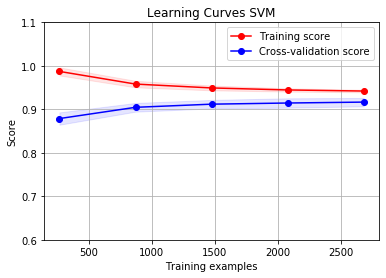

In [23]:
# Learning Curve
title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='linear', C=1)
X, y = tr_X_A1, list(zip(*tr_Y_A1))[0]
plot_learning_curve(estimator, title, X, y, (0.6, 1.1), cv=cv, n_jobs=-1)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

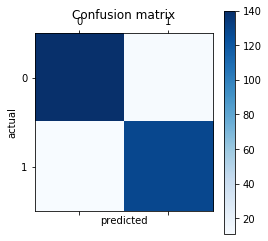

In [11]:
test_label = list(zip(*te_Y_A1))[0]
cf = confusion_matrix(test_label, pred_A1)
# print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

## Testing on new dataset

In [11]:
newX_A1, newy_A1 = a1_new.extract_features_labels()
newY_A1 = np.array([newy_A1, -(newy_A1 - 1)]).T

scaler = StandardScaler()
newX_reshape = newX_A1.reshape(len(newX_A1), len(newX_A1[0]) * len(newX_A1[0][0]))
temp_newX_A1 = scaler.fit_transform(newX_reshape)
# print(newY_A1)
# print(temp_newX_A1)

/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/shyhhao/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

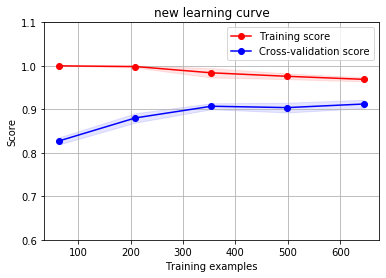

In [19]:
title = 'new learning curve'
X, y = temp_newX_A1, list(zip(*newY_A1))[0]
estimator = svm.SVC(kernel='linear', C=1)
plot_learning_curve(estimator, title, X, y, (0.6, 1.1), n_jobs=-1) 